<a href="https://colab.research.google.com/github/francji1/01ZLMA/blob/main/R/01ZLMA_zapoctova_uloha_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Coblabla"/></a>
TODO: change this to the right link

# Zadání zápočtové úlohy z předmětu 01ZLMA 2022/2023

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients





In [1]:
# %pip install pandas matplotlib xlrd

In [2]:
import pandas as pd
import numpy as np
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url, header=1)

In [3]:
df = df.rename(columns = {"default payment next month": "default"})

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df = df.rename(columns=lambda x: x.lower())

In [6]:
df.shape

(30000, 25)

In [7]:
bill_cols = list(filter(lambda col: col.find("bill_amt") != -1, df.columns))

In [8]:
pay_cols = list(filter(lambda col: col.find("pay_amt") != -1, df.columns))

In [9]:
df['bill_min'] = df[bill_cols].apply(min, axis=1)

In [10]:
df['bill_max'] = df[bill_cols].apply(max, axis=1)

In [11]:
df['pay_min'] = df[pay_cols].apply(min, axis=1)

In [12]:
df['pay_max'] = df[pay_cols].apply(max, axis=1)

In [13]:
df = df.drop(pay_cols + bill_cols + ['id'] + ['pay_' + str(i) for i in range(2,6)], axis=1)

In [14]:
df.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_6,default,bill_min,bill_max,pay_min,pay_max
0,20000,2,2,1,24,2,-2,1,0,3913,0,689
1,120000,2,2,2,26,-1,2,1,1725,3455,0,2000
2,90000,2,2,2,34,0,0,0,13559,29239,1000,5000
3,50000,2,2,1,37,0,0,0,28314,49291,1000,2019
4,50000,1,2,1,57,-1,0,0,5670,35835,679,36681


In [15]:
df = df[(df['bill_min'] > 0) &
        (df['pay_max'] > 0) &
        (df['marriage'] != 0) & 
        (df['marriage'] != 3) &
        (df['education'] != 0)]

In [16]:
df.loc[df['education'] > 3, 'education'] = 3

In [17]:
df['education'] = pd.Categorical(df['education'])

In [18]:
df['sex'] = pd.Categorical(df['sex'])

In [19]:
df['marriage'] = pd.Categorical(df['marriage'])

In [20]:
df.describe()

,limit_bal,age,pay_0,pay_6,default,bill_min,bill_max,pay_min,pay_max
count,21943.000000,21943.000000,21943.000000,21943.000000,21943.000000,21943.000000,21943.000000,21943.000000,2.194300e+04
mean,162801.334366,35.271977,0.085996,0.021328,0.222167,43168.164563,73786.276307,1665.886706,1.634583e+04
std,130553.935668,9.221242,1.042020,0.947823,0.415712,59592.725589,82413.780752,2748.702698,3.571387e+04
min,10000.000000,21.000000,-2.000000,-2.000000,0.000000,1.000000,12.000000,0.000000,1.500000e+01
25%,50000.000000,28.000000,0.000000,0.000000,0.000000,4596.500000,19652.500000,0.000000,2.843000e+03
50%,130000.000000,34.000000,0.000000,0.000000,0.000000,19852.000000,47637.000000,700.000000,5.300000e+03
75%,230000.000000,41.000000,0.000000,0.000000,0.000000,55951.500000,97714.500000,2050.000000,1.300000e+04
max,1000000.000000,79.000000,8.000000,8.000000,1.000000,551702.000000,983931.000000,63758.000000,1.227082e+06


In [21]:
df_table = df[['default', 
               'age', 
               'sex', 
               'education', 
               'marriage', 
               'limit_bal']].rename(columns={'age':'age_full', 'limit_bal':'limit_bal_full'})

In [22]:
age_breaks = [-np.infty, 25, 30, 35, 40, np.infty]
age_lables = ['<25', '25-30', '30-35','35-40', '>40']
df_table['age'] = pd.cut(df_table['age_full'], bins=age_breaks, labels=age_lables)

In [23]:
limit_bal_breaks = [-np.infty,50_000, 100_000, 150_000, 200_000, np.infty]
limit_bal_lables = ['<50k','50k-100k','100k-150k','150k-200k','>200k']
df_table['limit_bal'] = pd.cut(df_table['limit_bal_full'], bins=limit_bal_breaks, labels=limit_bal_lables)

In [24]:
df_table = df_table.drop(filter(lambda x: x.find("_full") != -1, df_table.columns), axis=1)

In [25]:
df_table_grouped = df_table.groupby(['age', 'limit_bal', 'sex'], dropna=False)
df_table = df_table_grouped.agg({'default':'sum'}).rename(columns = {'default':'default_yes'})

In [26]:
df_table['default_no'] = df_table_grouped.size() - df_table['default_yes']

In [27]:
df_table.head()

default_yes  default_no
age limit_bal sex                         
<25 <50k      1            210         444
              2            326         710
    50k-100k  1             23          94
              2            146         439
    100k-150k 1             12          43

In [28]:
sum(df_table['default_yes']) + sum(df_table['default_no'])

21943

In [29]:
#%pip install scikit-learn

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_data, test_data = train_test_split(df, test_size = 0.3, random_state=42, stratify=df['default'])

In [32]:
train_data.shape

(15360, 12)

In [33]:
test_data.shape

(6583, 12)

In [34]:
data_train, data_test = train_data, test_data

## Zadání

## 01 - Grafické zobrazení dat a jejich kontrola

Použijte dataset `train_data` a `test_data`. 

* Navrhněte vhodný způsob zobrazení dat, který vám pomůže určit, zdali použití logistické regrese pro predikci nesplacení úvěru je možné a vhodné při použítí zvolených trénovacích a testvacích dat.
* Vykreslete boxploty pro různé numerické proměnné, odezvu `default` a barevně odlište kategorické proměnné. Je z těchto obrázků možné odhadnout jaká proměnná bude mít vliv na odezvu? (jen `train_data`).
* Pro vybrané skupiny z předešlé otázky navrhněte vhodný statistický test, proveďte ho a řekněte zdali je vámi zvolená proměnná statisticky významná pro určení schopnosti splácet (jen `train_data`). 

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

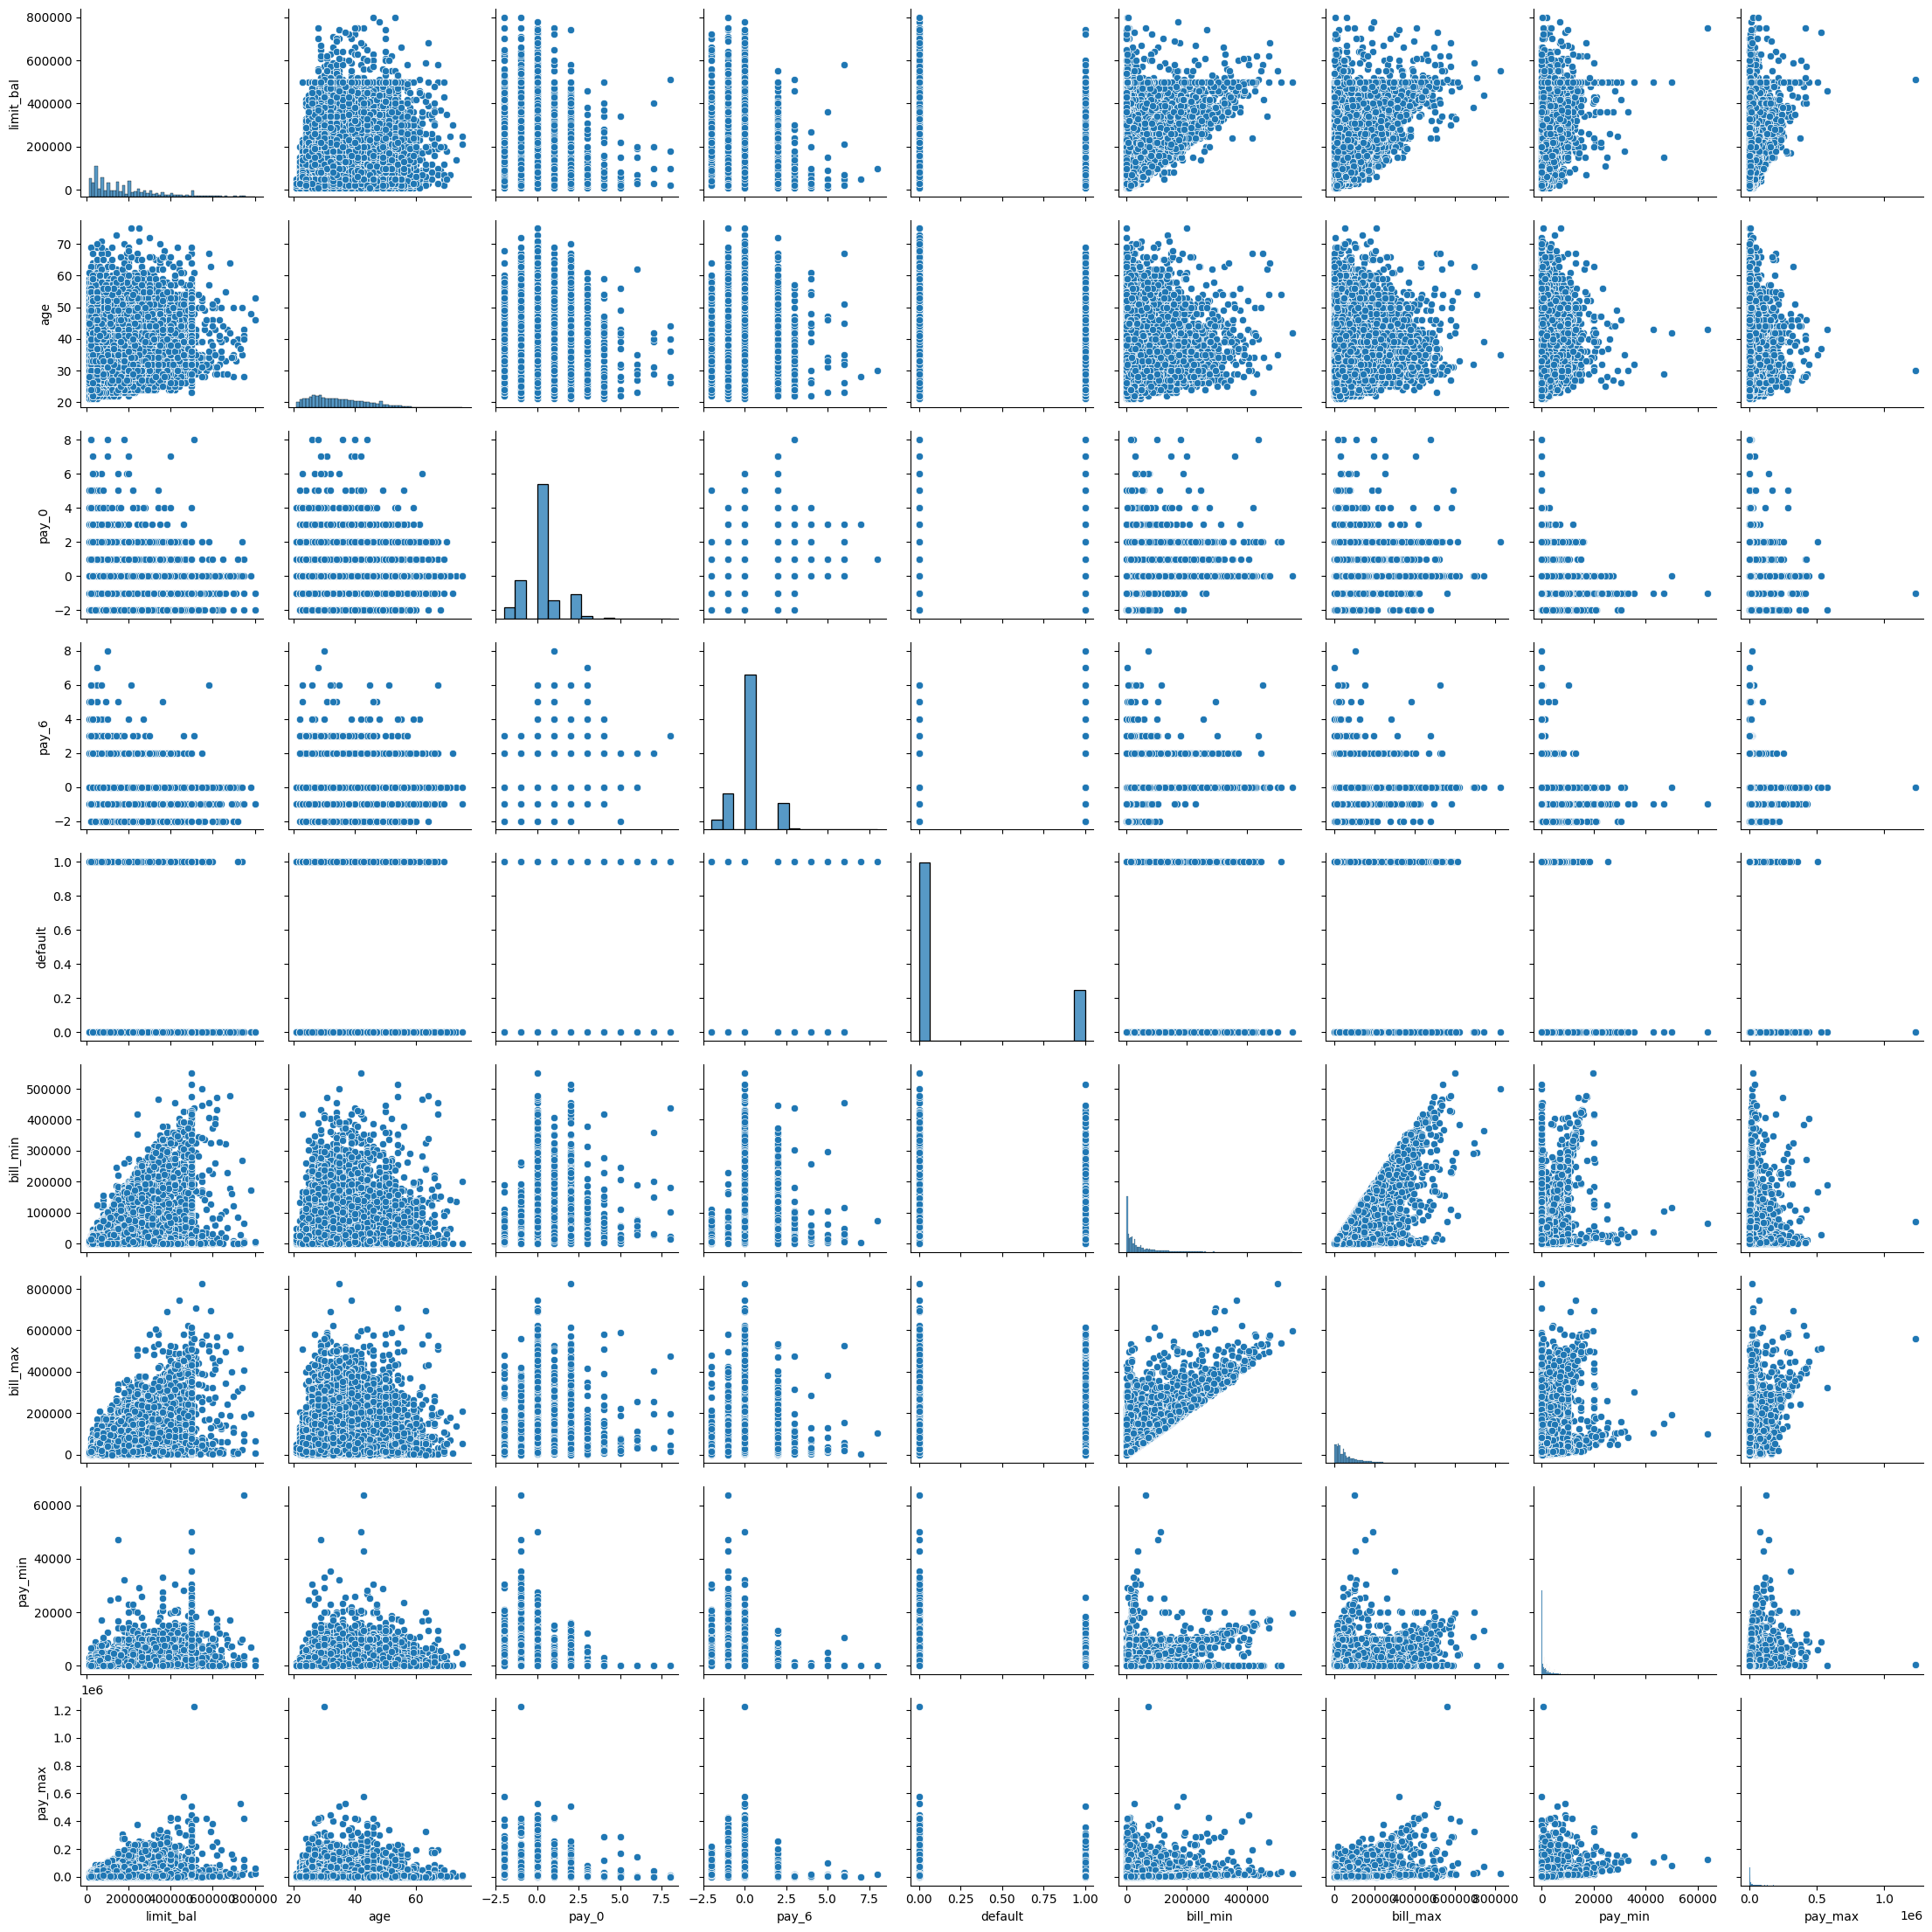

In [36]:
sns.pairplot(train_data)
plt.show()

/tmp/ipykernel_187014/65722708.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


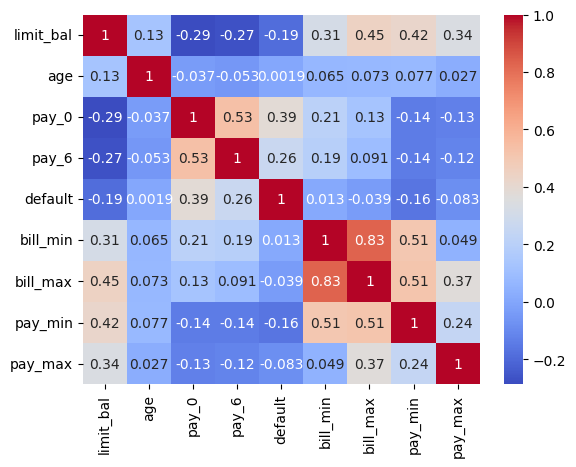

In [37]:
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

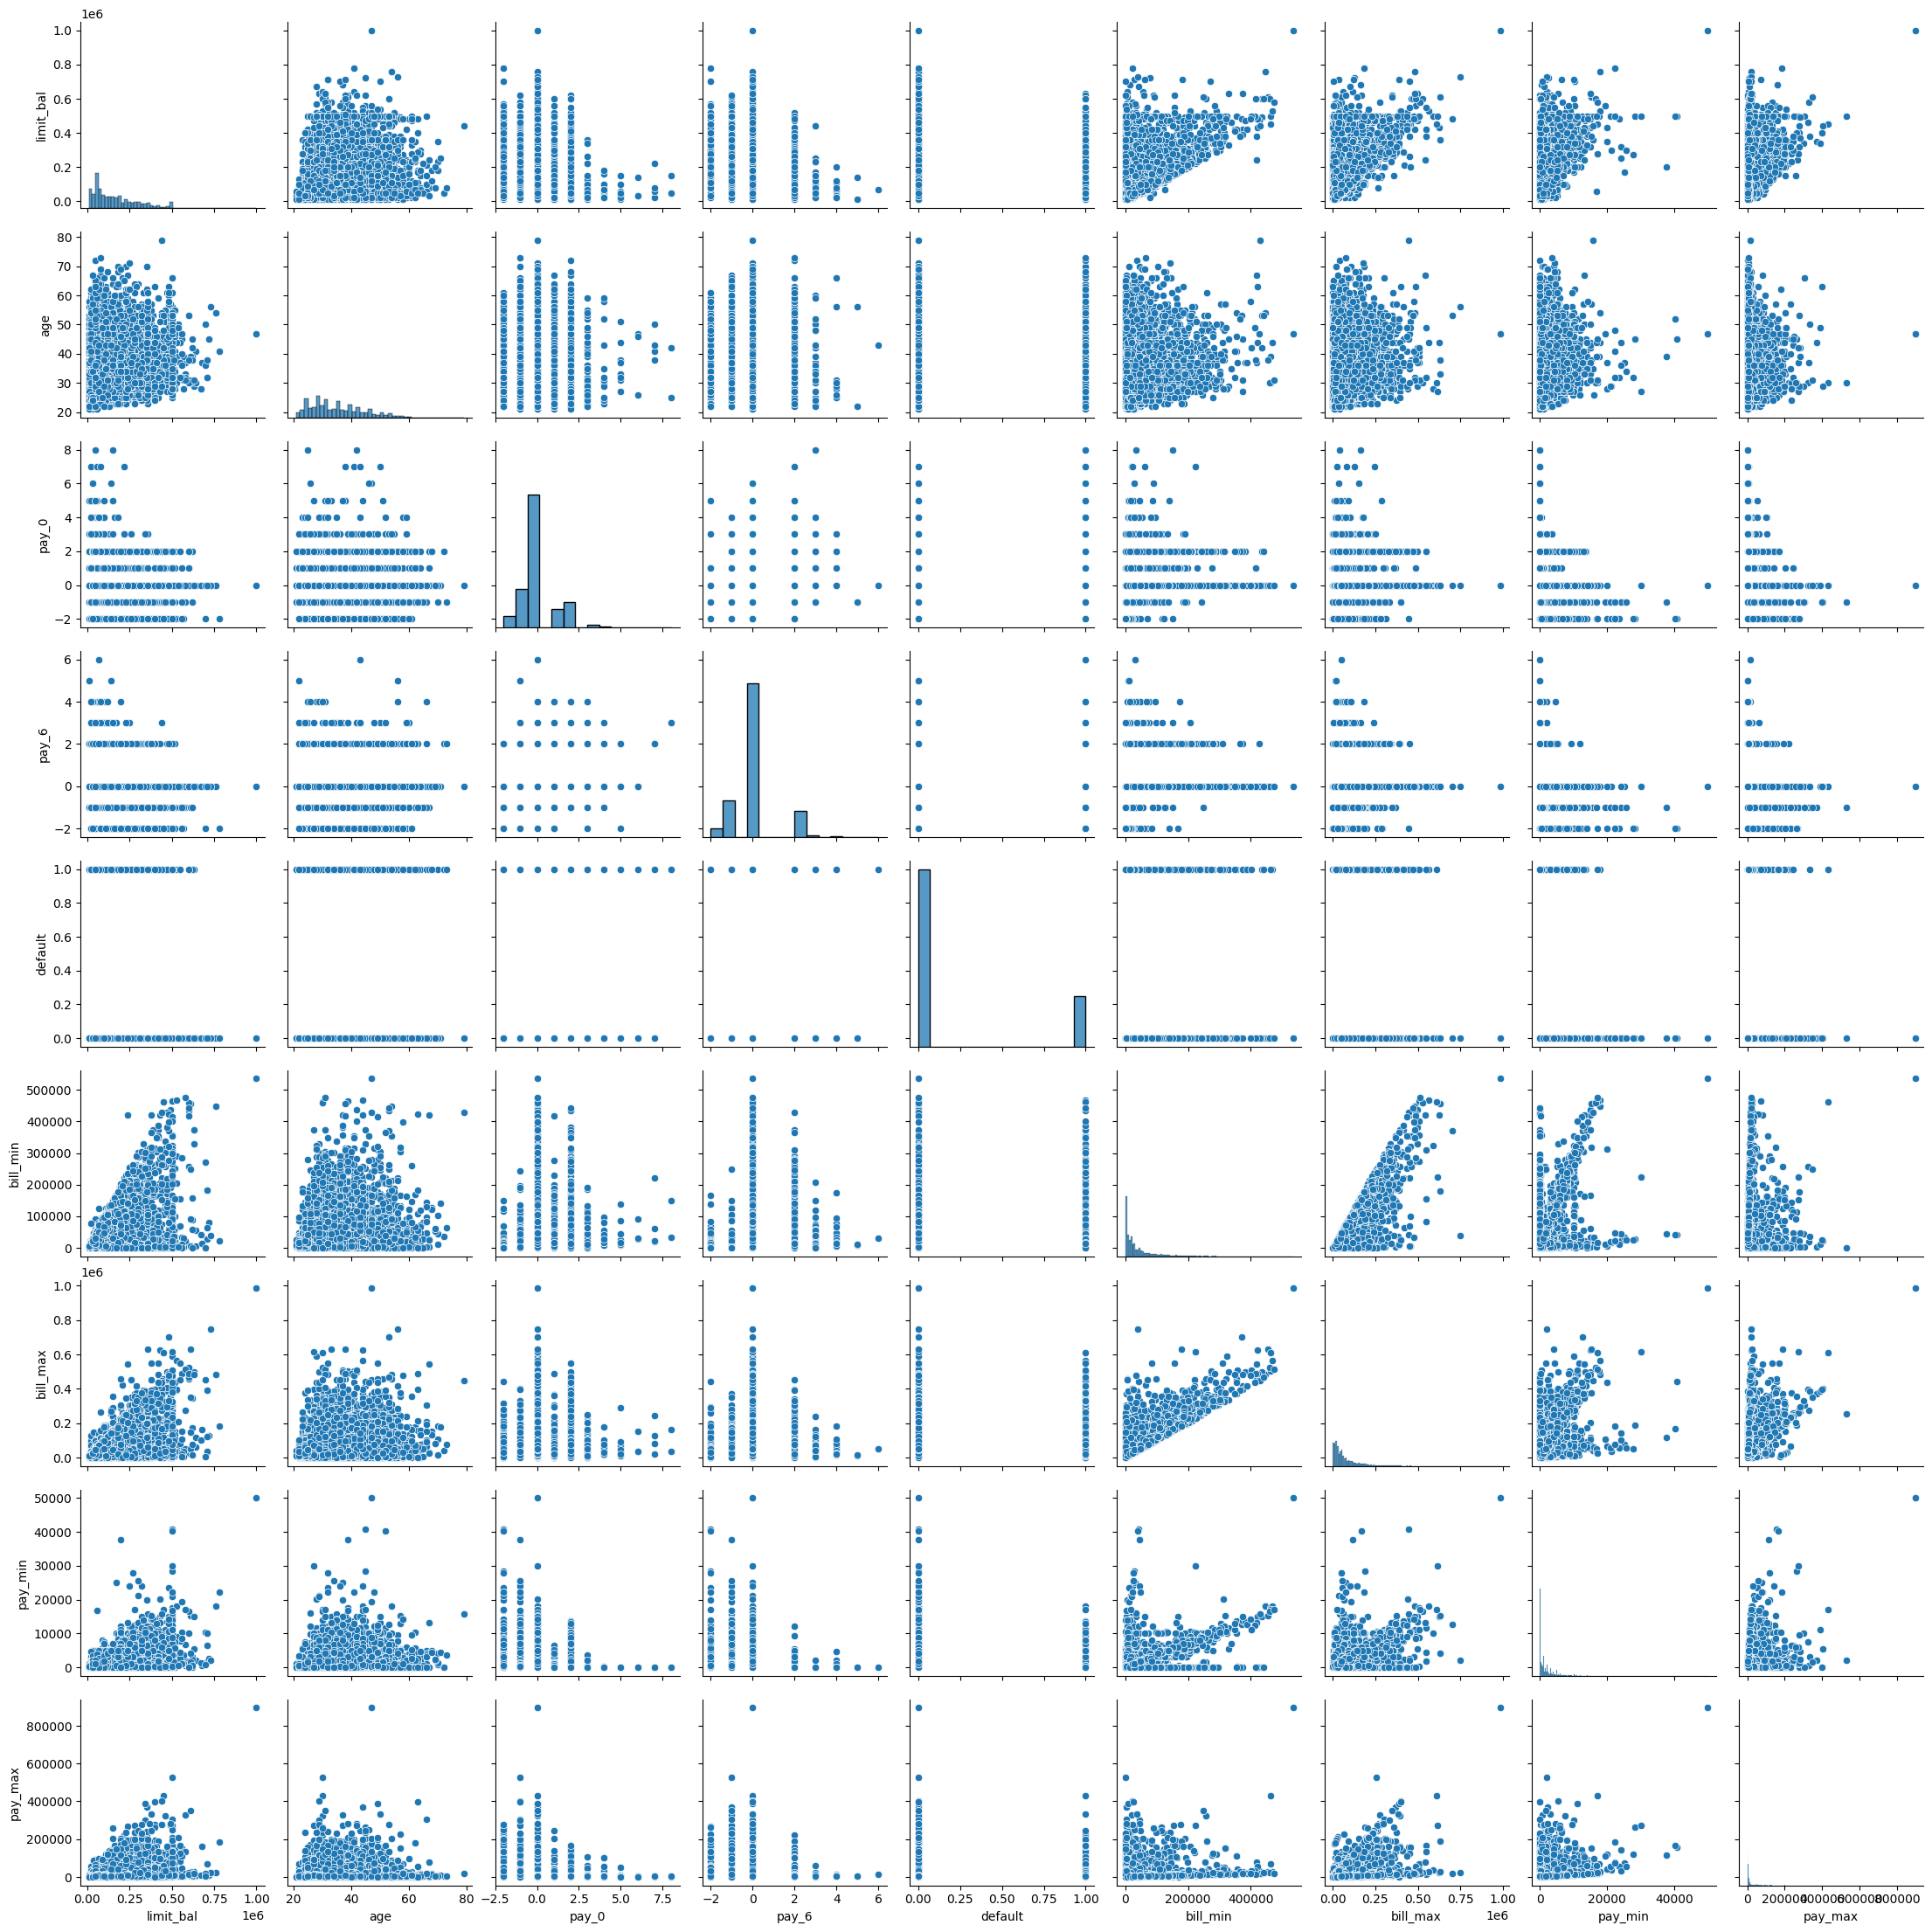

In [38]:
sns.pairplot(test_data)
plt.show()

In [39]:
head_data = train_data.head()
print(head_data)

       limit_bal sex education marriage  age  pay_0  pay_6  default  bill_min  \
25836     170000   2         2        1   31      0      0        0    102477   
10130     470000   1         1        1   38      0      0        0    152017   
7886      500000   1         1        2   34     -1     -1        0      2300   
2830      220000   1         2        1   32      0      0        0    103124   
16394     320000   2         2        1   46     -1     -1        0       119   

       bill_max  pay_min  pay_max  
25836    111881     4071     5402  
10130    160843     5269     9471  
7886     154085        0   211192  
2830     202010     3746     4500  
16394     18428        0    18443  


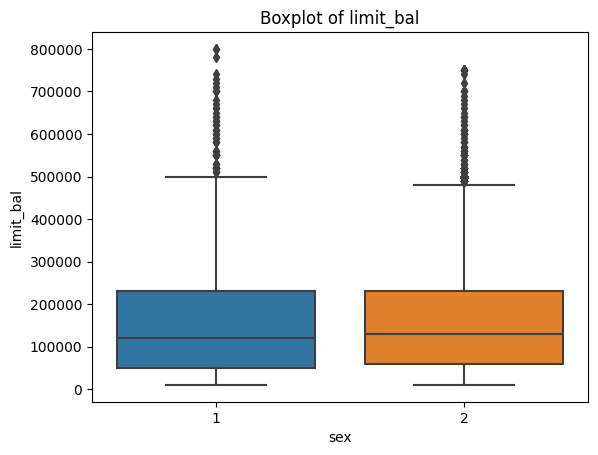

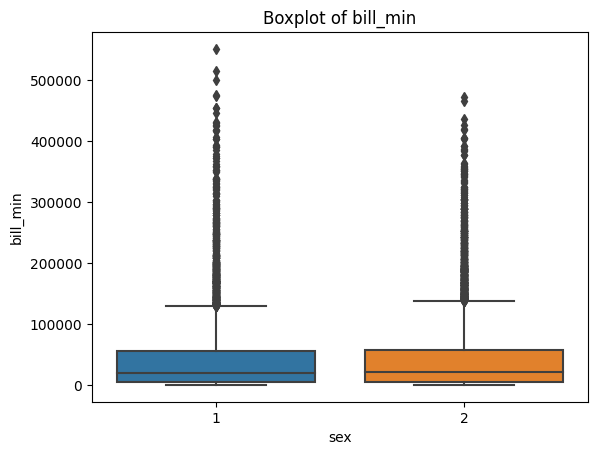

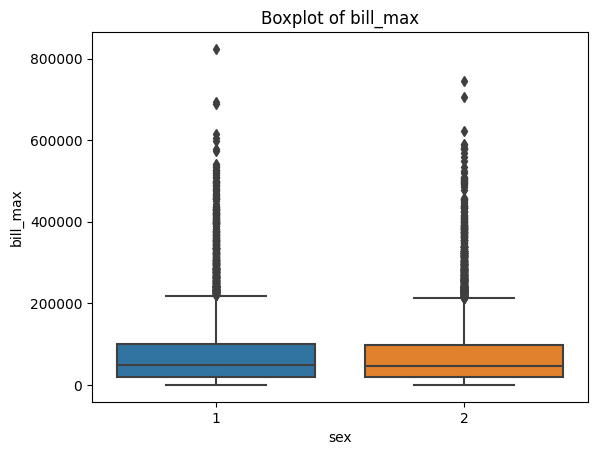

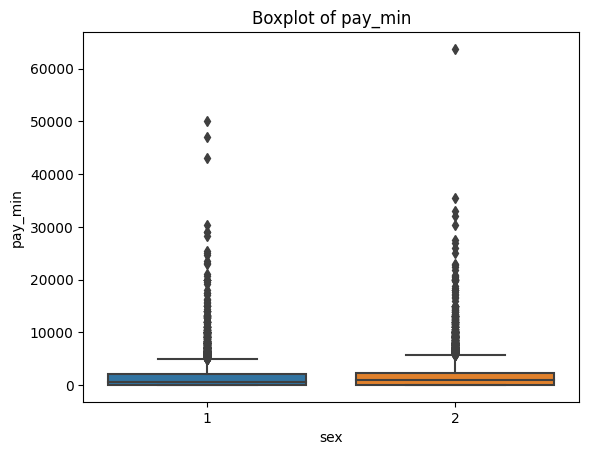

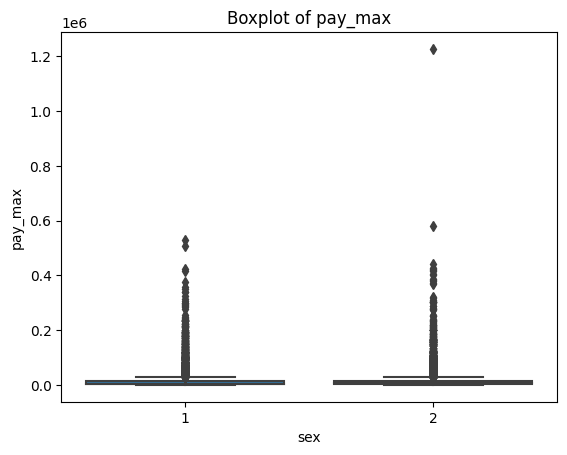

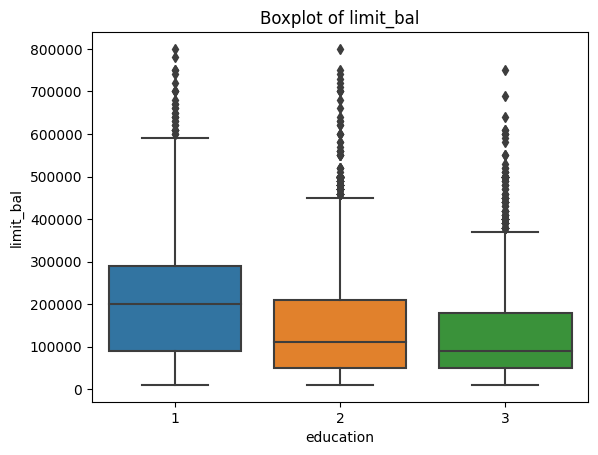

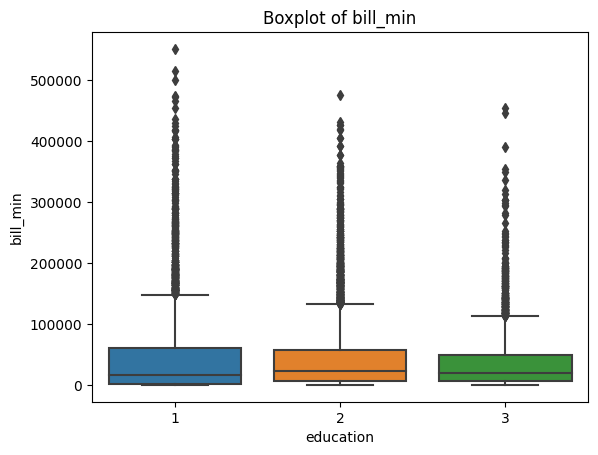

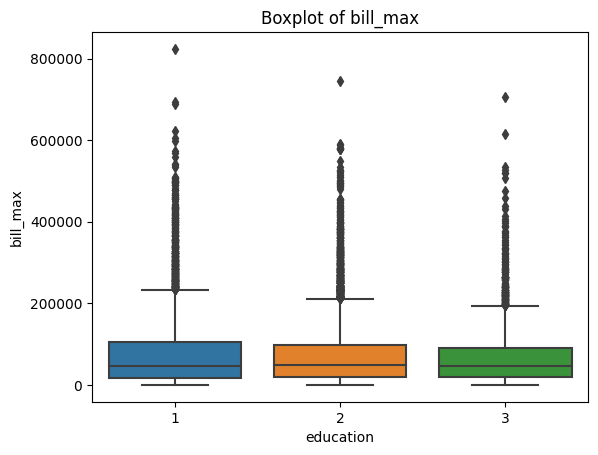

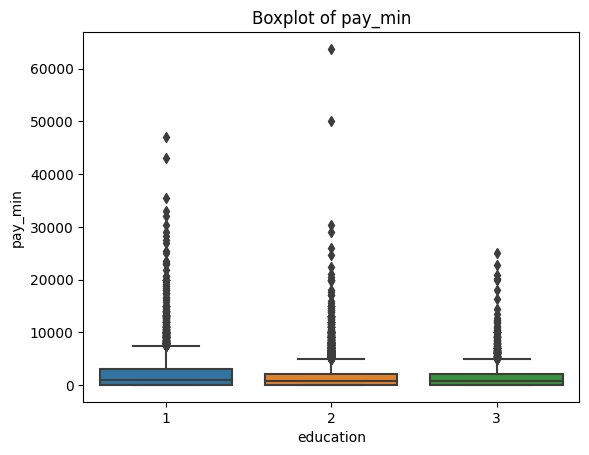

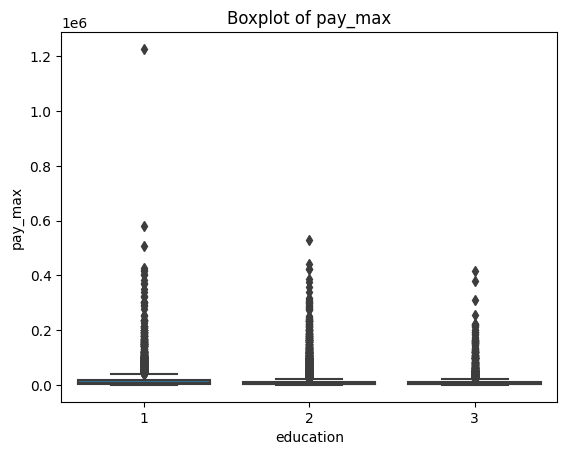

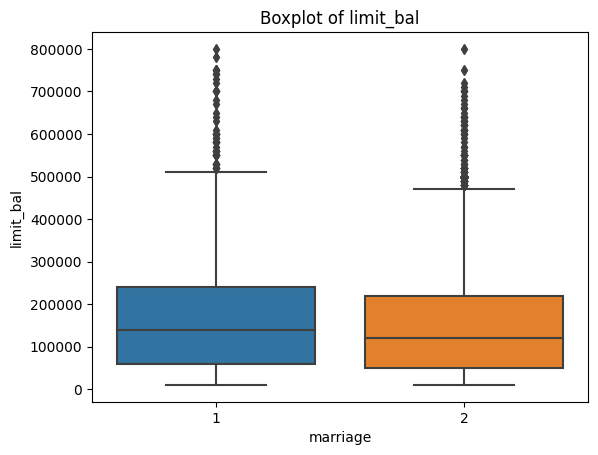

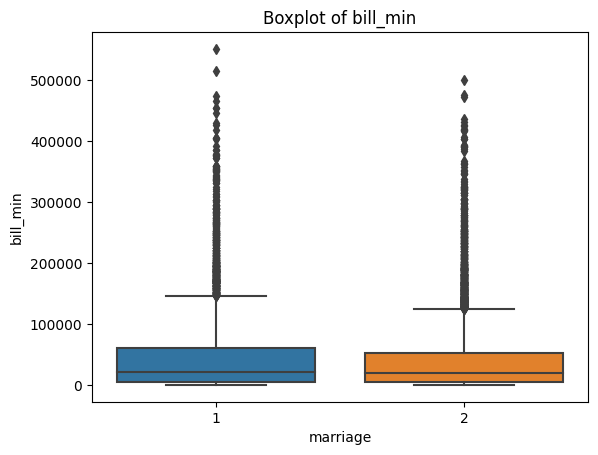

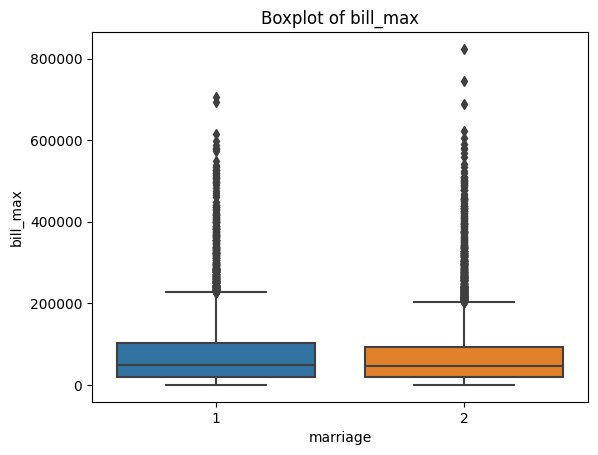

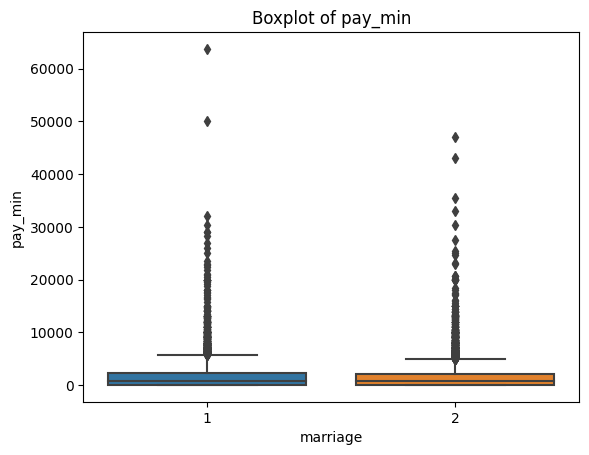

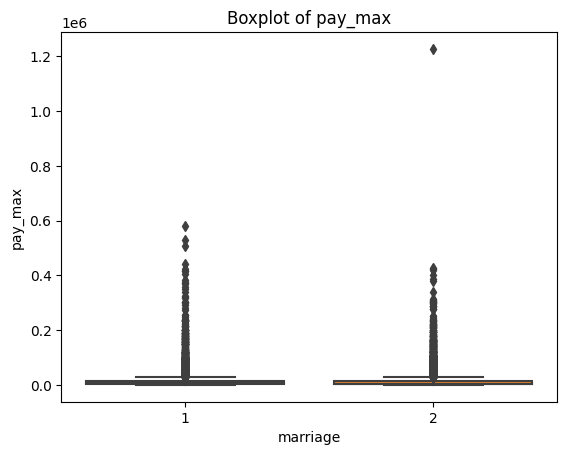

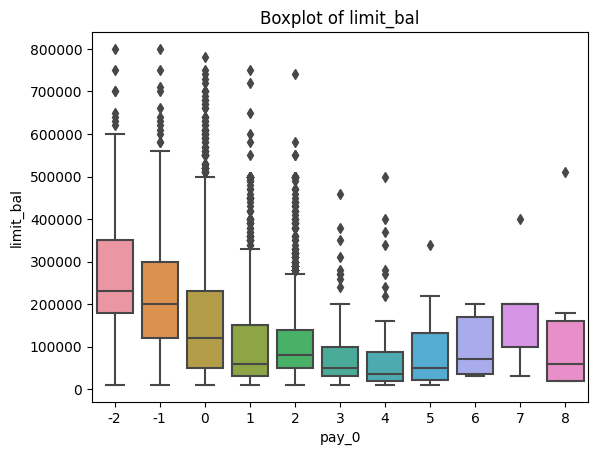

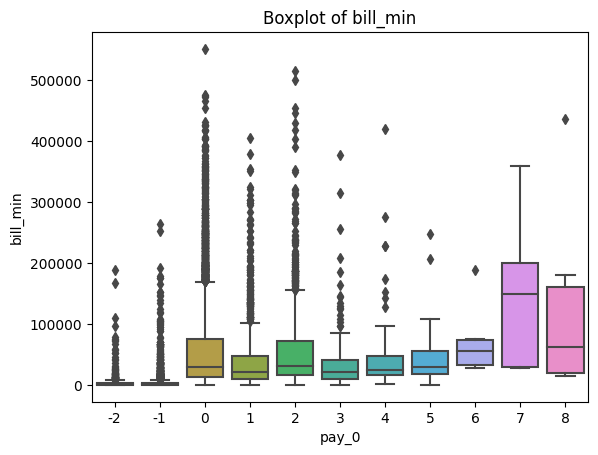

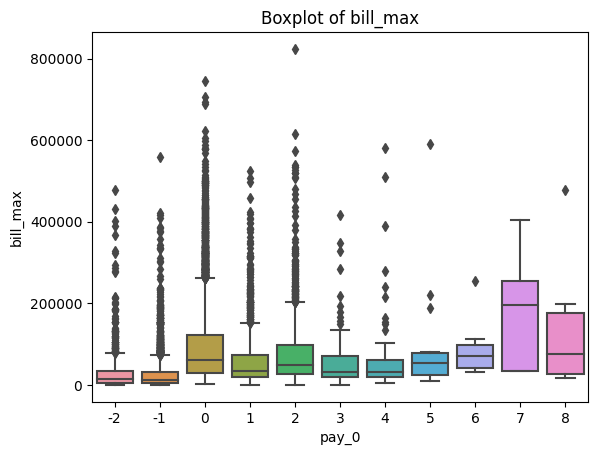

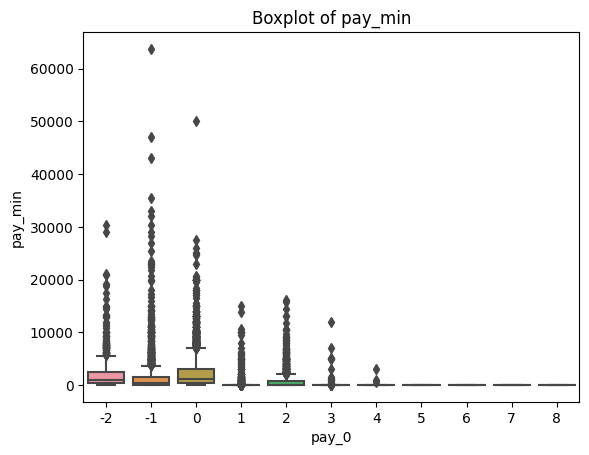

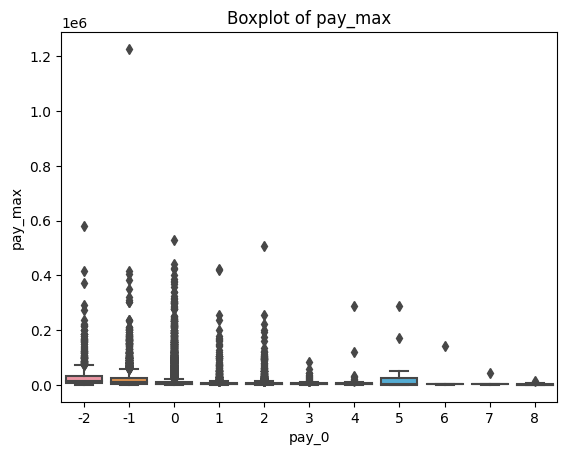

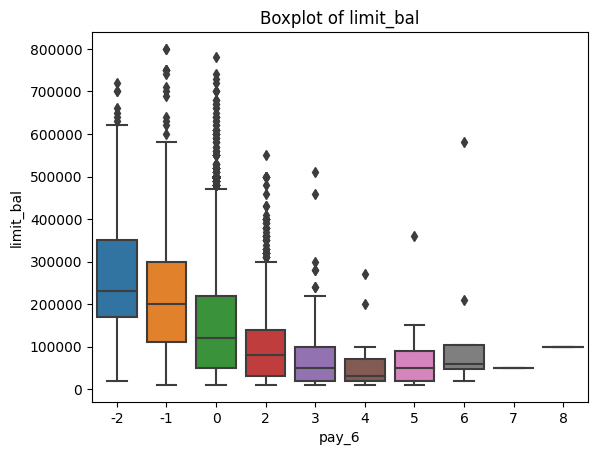

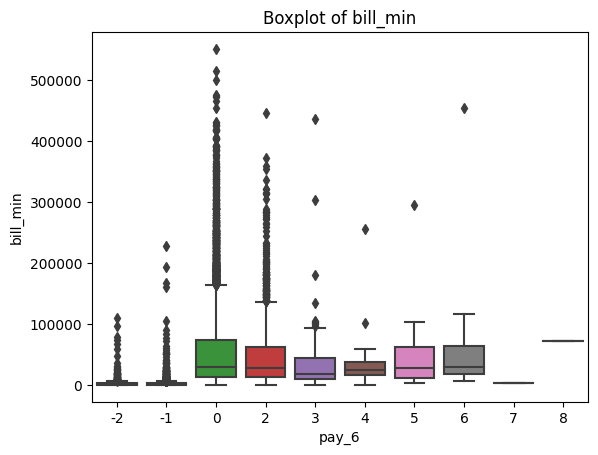

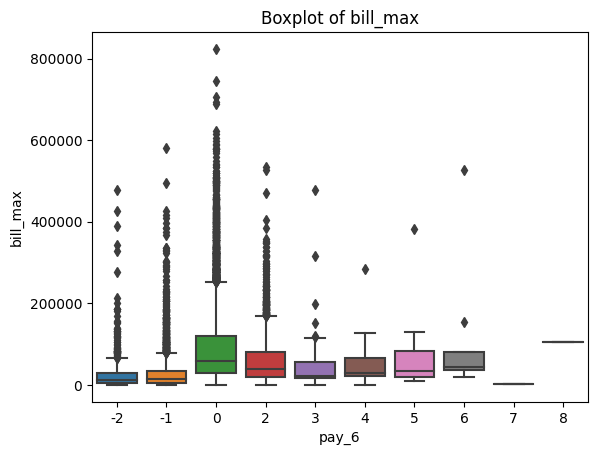

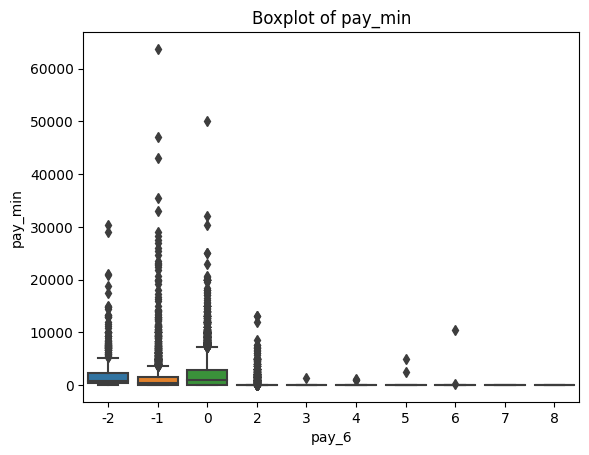

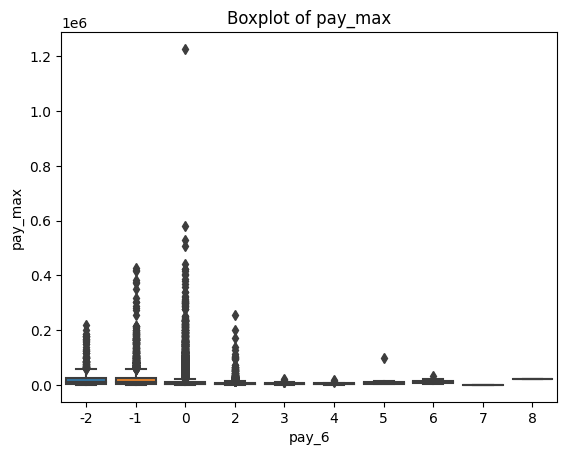

In [40]:

variables = ['limit_bal', 'bill_min', 'bill_max', 'pay_min', 'pay_max']
categorical_variable = 'sex'

for variable in variables:
    sns.boxplot(data=train_data, x=categorical_variable, y=variable)
    plt.title(f'Boxplot of {variable}')
    plt.show()

variables = ['limit_bal', 'bill_min', 'bill_max', 'pay_min', 'pay_max']
categorical_variable = 'education'

for variable in variables:
    sns.boxplot(data=train_data, x=categorical_variable, y=variable)
    plt.title(f'Boxplot of {variable}')
    plt.show()

variables = ['limit_bal', 'bill_min', 'bill_max', 'pay_min', 'pay_max']
categorical_variable = 'marriage'

for variable in variables:
    sns.boxplot(data=train_data, x=categorical_variable, y=variable)
    plt.title(f'Boxplot of {variable}')
    plt.show()

variables = ['limit_bal', 'bill_min', 'bill_max', 'pay_min', 'pay_max']
categorical_variable = 'pay_0'

for variable in variables:
    sns.boxplot(data=train_data, x=categorical_variable, y=variable)
    plt.title(f'Boxplot of {variable}')
    plt.show()

variables = ['limit_bal', 'bill_min', 'bill_max', 'pay_min', 'pay_max']
categorical_variable = 'pay_6'

for variable in variables:
    sns.boxplot(data=train_data, x=categorical_variable, y=variable)
    plt.title(f'Boxplot of {variable}')
    plt.show()

Tohle mi přijde trochu nesmyslné, ale je to v požadavcích, mě to dává smysl jen pro proměnou default.

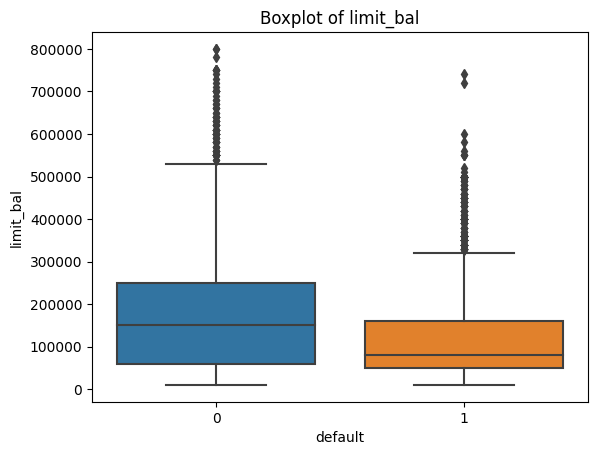

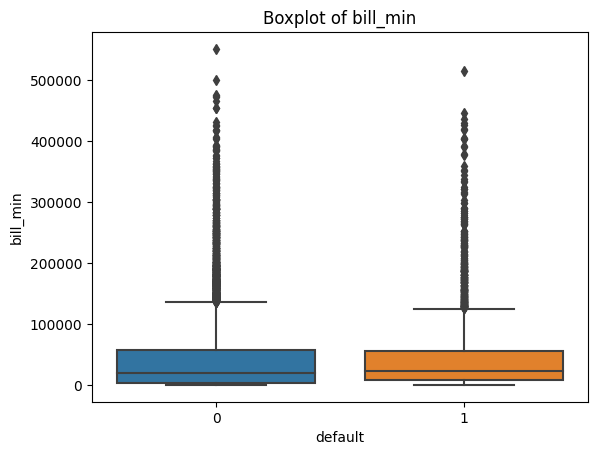

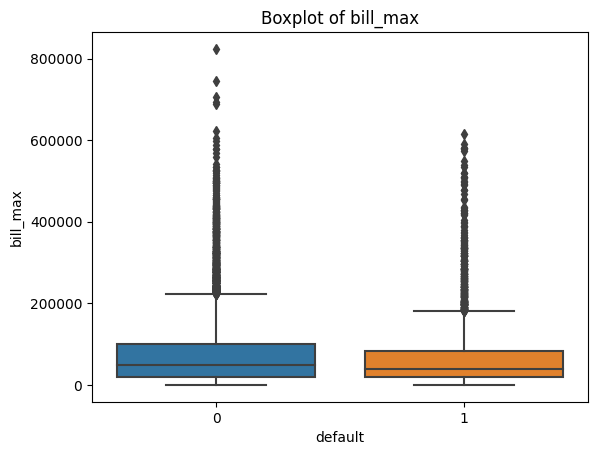

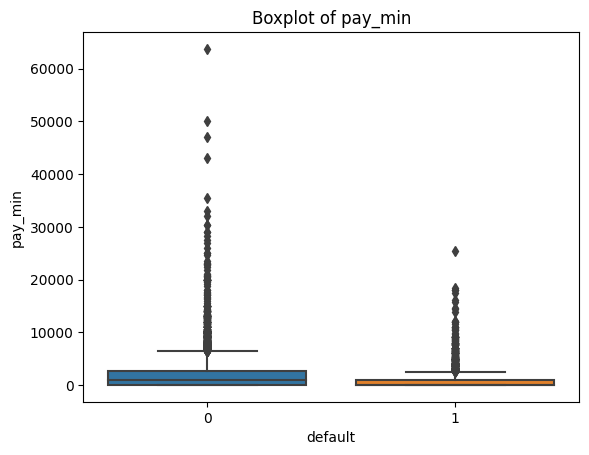

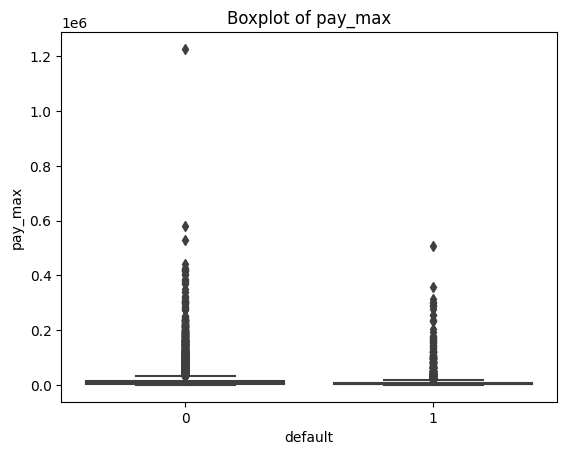

In [41]:
variables = ['limit_bal', 'bill_min', 'bill_max', 'pay_min', 'pay_max']
categorical_variable = 'default'

for variable in variables:
    sns.boxplot(data=train_data, x=categorical_variable, y=variable)
    plt.title(f'Boxplot of {variable}')
    plt.show()

In [42]:
import scipy.stats as stats
import statsmodels.api as sm

In [43]:
X = train_data['limit_bal']
y = train_data['default']

X = sm.add_constant(X)  # Add a constant term to the predictor variable

logit_model = sm.Logit(y, X)
result = logit_model.fit()
p_value = result.pvalues[1]
p_value

Optimization terminated successfully.
         Current function value: 0.509674
         Iterations 6


1.921317687078177e-112

In [44]:
X = train_data['pay_min']
y = train_data['default']

X = sm.add_constant(X)  # Add a constant term to the predictor variable

logit_model = sm.Logit(y, X)
result = logit_model.fit()
p_value = result.pvalues[1]
p_value

Optimization terminated successfully.
         Current function value: 0.508590
         Iterations 7


6.16407672029757e-96

In [45]:
X = train_data['bill_max']
y = train_data['default']

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()
p_value = result.pvalues[1]
p_value

Optimization terminated successfully.
         Current function value: 0.528789
         Iterations 5


1.1595328928726641e-06

## 02 - Logistická regrese agregovaná tabulková data

použijte `df_table`





* Vytvořte odezvu pro logistický model binomického rozdělení a sestrojte nulový model. Jaká je ve zkoumané populaci  průměrná šance na neschopnost splácet úvěr  a jaká je pravděpodobnost nesplacení úvěru? 

* Sestrojte model, kde závisí výskyt nesplacení úvěru pouze na proměnné `limit_bal`. Je vliv limitu významná proměnná na hladině významnosti 0.05? Pokud ano, zjistěte, kolikrát mají lidé s limitem větším než 100 vetší šanci na neschopnost splácet než lidé s limitem nad 200.

* Sestrojte model, kde závisí výskyt neschopnosti splácet pouze na věku `age`.  Je věk  statisticky významná proměnná na hladině významnosti 0.01? Pokud ano, zjistěte, kolikrát mají pacienti ve věku mezi 35-40 menší šanci na  neschopnost splácet než lidé ve věku 20-25.

* Předpokládejte, že šance na neschopnost splácet roste exponenciálně s hodnotou limitu a klesá exponenciálně s věkem. Vytvořte příslušné numerické spojité prediktory. Sestrojte model, kde šance na neschopnost splácet bude záležet na numerických hodnotách tlaku a věku (bez interakce). Jaký je poměr šancí na neschopnost splácet mezi lidmi lišícími se limitem o 50000 a majícími stejný věk? 

* Otestujte předešlý model proti saturovanému modelu. Má tento test opodstatnění? Okomentujte jeho výsledek. 

In [46]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [47]:
df_table.head()

default_yes  default_no
age limit_bal sex                         
<25 <50k      1            210         444
              2            326         710
    50k-100k  1             23          94
              2            146         439
    100k-150k 1             12          43

model:

$$ \ln(\: p(y, x | \theta) \: ) = \theta^T \cdot x ≡ \theta \cdot x $$



Z dostupných informací - logistická regrese z knihovny statsmodels potřebuje na vstupu "individuální data" - tj. v našem případě dataframe `df` a ne kontingenční tabulku `df_table`. Příp. existují způsoby, jak z konting. tabulky vyrobit tabulku jednotlivých (individálních) pozorování.


In [48]:
# ukolem je ke konstrukci modelu pouzit kont. tabulku, z tech duvodu pouzivame individualni
# data, ovsem jen ty promenne, na zaklade kterych byla kont. tabulka sestavovana

In [49]:
X = df[['limit_bal', 'sex', 'age']]
y = df['default']
model = sm.Logit(y, X)
result = model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.510293
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                21943
Model:                          Logit   Df Residuals:                    21940
Method:                           MLE   Df Model:                            2
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:                 0.03652
Time:                        16:52:24   Log-Likelihood:                -11197.
converged:                       True   LL-Null:                       -11622.
Covariance Type:            nonrobust   LLR p-value:                4.635e-185
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
limit_bal  -4.434e-06   1.59e-07    -27.919      0.000   -4.75e-06   -4.12e-06
sex           -0.3064      0.025    -12.285      0.000      -0.355      -0.258
age           -0.0033      0.001     -2.782      0.005      -0.006      -0.001
==============================================================================
"""

In [50]:
f'AIC = {result.aic}'

'AIC = 22400.73427323265'

In [51]:
# nulovy model
model_nulo = smf.logit('default ~ 1', data=df)
result_nulo = model_nulo.fit()
result_nulo.summary()

Optimization terminated successfully.
         Current function value: 0.529636
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                21943
Model:                          Logit   Df Residuals:                    21942
Method:                           MLE   Df Model:                            0
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:               8.452e-11
Time:                        16:52:24   Log-Likelihood:                -11622.
converged:                       True   LL-Null:                       -11622.
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2531      0.016    -77.163      0.000      -1.285      -1.221
==============================================================================
"""

In [52]:
f'AIC = {result_nulo.aic}'

'AIC = 23245.62354846453'

### pravděpodobnost nesplacení úvěru
tj. p(default = 0)

$$ p(\mbox{default}=0) = p(y=0)  = \sum_{x \in X} p(y = 0, x | \theta^{̂} )$$

kde $j$ je index, jdoucí od 1 do délky vektoru $x$ (tedy počet uvažovaných příznaků)

kde $ \theta^{̂} $ je odhad (vektorový) a $x$ je vektor daných vysvětlujicích proměnných.

$$ \sum_{x \in X} p(y = 0, x | \theta^{̂} ) = \sum_{x \in X} \exp( \theta^{̂} \cdot x) = \sum_{x \in X} \exp(\sum_{j} \theta^{̂}_j \cdot x_j) $$

tedy počítáme:


In [53]:
float(result_nulo.params)

-1.2530852608759429

In [54]:
theta = float(result_nulo.params)
x = 1
prst_pro_jeden_x = np.exp(theta * x)
prst_pro_jeden_x

0.2856222170142958

### šance na neschopnost splácet úvěr

$$ \mbox{chance}(\mbox{default}=0) = \frac{p(y=0,x| \theta^{̂})}{p(y=1,x| \theta^{̂})} = \frac{\exp( \theta^{̂}  \cdot x)}{1 - \exp( \theta^{̂}  \cdot x)} $$

In [55]:
chance = (np.exp(theta * x)) / (1 - np.exp(theta * x))
chance

0.39981956860493734

### model pouze s `limit_bal`

In [56]:
X = df[['limit_bal']]
y = df['default']
model_limit_bal = sm.Logit(y, X)
result_limit_bal = model_limit_bal.fit()

result_limit_bal.summary()

Optimization terminated successfully.
         Current function value: 0.524155
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                21943
Model:                          Logit   Df Residuals:                    21942
Method:                           MLE   Df Model:                            0
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:                 0.01035
Time:                        16:52:24   Log-Likelihood:                -11502.
converged:                       True   LL-Null:                       -11622.
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
limit_bal  -7.517e-06   1.13e-07    -66.611      0.000   -7.74e-06    -7.3e-06
==============================================================================
"""

In [57]:
f'AIC = {result_limit_bal.aic}'

'AIC = 23005.083905090516'

ano, proměnná `limit_bal` je na hladině 0.05 významná.

kolikrát mají lidé s limitem větším než 100 vetší šanci na neschopnost splácet než lidé s limitem nad 200:

In [58]:
df_limitbal_above_100 = df[df.limit_bal>100000]
#print(df.describe())
#print(df_limitbal_above_100.describe())
df_limitbal_above_200 = df[df.limit_bal>200000]
#print(df.describe())
#print(df_limitbal_above_200.describe())

In [59]:
y_limitbal_above_100 = df_limitbal_above_100['default']
y_limitbal_above_200 = df_limitbal_above_200['default']

x_limitbal_above_100 = df_limitbal_above_100['limit_bal']
x_limitbal_above_200 = df_limitbal_above_200['limit_bal']

In [60]:
theta = float(result_limit_bal.params)
chance_for_limitbal_above_100 = 1/len(x_limitbal_above_100)  * np.sum(np.exp(theta * x_limitbal_above_100))
print(chance_for_limitbal_above_100)
chance_for_limitbal_above_200 = 1/len(x_limitbal_above_200) * np.sum(np.exp(theta * x_limitbal_above_200))
chance_for_limitbal_above_200

0.20193940582994188


0.10708137305733914

In [61]:
podil = chance_for_limitbal_above_100 / chance_for_limitbal_above_200
print(f'podil sanci je {podil}, tj. cca {int(podil * 100)} procent')

podil sanci je 1.8858499855227748, tj. cca 188 procent


$$  \mbox{chance}(y=0 | \mbox{limit_bal} > 100) =  $$


$$ \mbox{chance}(y=0 | \mbox{limit_bal} > 200) =  $$



$$ \mbox{tolikrat} = \frac{\mbox{chance}(y=0 | \mbox{limit_bal} > 100)}{\mbox{chance}(y=0 | \mbox{limit_bal} > 200)}  = $$

### model pouze s `age`

In [62]:
X = df[['age']]
y = df['default']
model_age = sm.Logit(y, X)
result_age = model_age.fit()

result_age.summary()

Optimization terminated successfully.
         Current function value: 0.538478
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                21943
Model:                          Logit   Df Residuals:                    21942
Method:                           MLE   Df Model:                            0
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:                -0.01669
Time:                        16:52:24   Log-Likelihood:                -11816.
converged:                       True   LL-Null:                       -11622.
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0340      0.000    -73.979      0.000      -0.035      -0.033
==============================================================================
"""

In [63]:
f'AIC = {result_age.aic}'

'AIC = 23633.633566799595'

ano, `age` je statisticky významná na hledině 0.01

kolikrát mají pacienti ve věku mezi 35-40 menší šanci na neschopnost splácet než lidé ve věku 20-25:

In [64]:
df_age_35_40 =df[(df['age'] >= 35) & (df['age'] <= 40)]
#print(df.describe())
#print(df_age_35_40.describe())
df_age_20_25 =df[(df['age'] >= 20) & (df['age'] <= 25)]
#print(df.describe())
#print(df_age_20_25.describe())

In [65]:
y_age_35_40 = df_age_35_40['default']
y_age_20_25 = df_age_20_25['default']

x_age_35_40 = df_age_35_40['age']
x_age_20_25 = df_age_20_25['age']

In [66]:
theta = float(result_age.params)
chance_age_35_40 = 1/len(x_age_35_40) * np.sum(np.exp(theta * x_age_35_40))
chance_age_35_40

0.28086730663755266

In [67]:
chance_age_20_25 = 1/len(x_age_20_25) * np.sum(np.exp(theta * x_age_20_25))
chance_age_20_25

0.44619467592480766

In [68]:
podil = chance_age_35_40 / chance_age_20_25
f'podil sanci je {podil}, tj. cca {int(podil * 100)} procent'

'podil sanci je 0.6294725638655629, tj. cca 62 procent'

### Model s `limit_bal` a `-age`

In [69]:
X = pd.DataFrame()
X['limit_bal'] = df.limit_bal # šance na neschopnost splácet roste exponenciálně s hodnotou limitu
X['age'] = (-1) * df.age      # ... a klesá exponenciálně s věkem
y = df['default']
model_limit_age = sm.Logit(y, X)
result_limit_age = model_limit_age.fit()

result_limit_age.summary()

Optimization terminated successfully.
         Current function value: 0.513741
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                21943
Model:                          Logit   Df Residuals:                    21941
Method:                           MLE   Df Model:                            1
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:                 0.03001
Time:                        16:52:24   Log-Likelihood:                -11273.
converged:                       True   LL-Null:                       -11622.
Covariance Type:            nonrobust   LLR p-value:                1.001e-153
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
limit_bal  -4.775e-06    1.6e-07    -29.918      0.000   -5.09e-06   -4.46e-06
age            0.0151      0.001     21.094      0.000       0.014       0.016
==============================================================================
"""

In [70]:
f'AIC = {result_limit_age.aic}'

'AIC = 22550.036381414226'

Jaký je poměr šancí na neschopnost splácet mezi lidmi lišícími se limitem o 50000 a majícími stejný věk?

In [71]:
#for curr_age in df.age:
#    print(curr_age)

In [72]:
X = df[['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_6',
    'bill_min', 'bill_max', 'pay_min', 'pay_max']]
y = df['default']
model = sm.Logit(y, X)
result = model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.442313
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                21943
Model:                          Logit   Df Residuals:                    21932
Method:                           MLE   Df Model:                           10
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:                  0.1649
Time:                        16:52:24   Log-Likelihood:                -9705.7
converged:                       True   LL-Null:                       -11622.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
limit_bal  -1.769e-06   2.08e-07     -8.506      0.000   -2.18e-06   -1.36e-06
sex           -0.1782      0.032     -5.532      0.000      -0.241      -0.115
education     -0.1113      0.027     -4.191      0.000      -0.163      -0.059
marriage      -0.3328      0.028    -11.820      0.000      -0.388      -0.278
age           -0.0028      0.002     -1.685      0.092      -0.006       0.000
pay_0          0.7354      0.021     35.429      0.000       0.695       0.776
pay_6          0.1671      0.021      7.950      0.000       0.126       0.208
bill_min    4.287e-06   7.62e-07      5.626      0.000    2.79e-06    5.78e-06
bill_max   -1.405e-06   5.93e-07     -2.369      0.018   -2.57e-06   -2.42e-07
pay_min       -0.0002   1.36e-05    -13.170      0.000      -0.000      -0.000
pay_max     1.793e-07    8.4e-07      0.214      0.831   -1.47e-06    1.82e-06
==============================================================================
"""

In [73]:
result.aic

19433.370244576356

In [74]:
formula_satur = 'default ~ limit_bal * sex * education * marriage * age * pay_0 * pay_6 * bill_min * bill_max * pay_min * pay_max'
########## do not run in colab, it crashes....
#model_satur = smf.logit(formula_satur, data=df).fit()
#print(model_satur.summary())

Na saturovany model nemame data (prilis mnoho interakci prilis vysokeho radu)

In [75]:
formula_order_1 = 'default ~ limit_bal + sex + education + marriage + age + \
                pay_0 + pay_6 + bill_min + bill_max + pay_min + pay_max '
my_interactions = ' + limit_bal * bill_max * pay_max'
formula_interactions = formula_order_1 + my_interactions

model_interactions = smf.logit(formula_interactions, data=df).fit()

model_interactions.summary()

Optimization terminated successfully.
         Current function value: 0.440400
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                21943
Model:                          Logit   Df Residuals:                    21926
Method:                           MLE   Df Model:                           16
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:                  0.1685
Time:                        16:52:24   Log-Likelihood:                -9663.7
converged:                       True   LL-Null:                       -11622.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.7755      0.108     -7.177      0.000      -0.987      -0.564
sex[T.2]                      -0.1024      0.037     -2.762      0.006      -0.175      -0.030
education[T.2]                -0.0539      0.044     -1.237      0.216      -0.139       0.032
education[T.3]                -0.1716      0.057     -2.993      0.003      -0.284      -0.059
marriage[T.2]                 -0.2228      0.042     -5.369      0.000      -0.304      -0.142
limit_bal                  -2.214e-06   2.57e-07     -8.627      0.000   -2.72e-06   -1.71e-06
age                            0.0028      0.002      1.264      0.206      -0.002       0.007
pay_0                          0.7382      0.021     35.464      0.000       0.697       0.779
pay_6                          0.1666      0.021      7.893      0.000       0.125       0.208
bill_min                    4.334e-06   7.39e-07      5.862      0.000    2.88e-06    5.78e-06
bill_max                   -5.487e-06   8.04e-07     -6.829      0.000   -7.06e-06   -3.91e-06
pay_min                       -0.0002   1.36e-05    -13.050      0.000      -0.000      -0.000
pay_max                      -6.2e-06   2.79e-06     -2.220      0.026   -1.17e-05   -7.26e-07
limit_bal:bill_max          1.239e-11   1.73e-12      7.147      0.000    8.99e-12    1.58e-11
limit_bal:pay_max           2.959e-12   9.03e-12      0.328      0.743   -1.47e-11    2.07e-11
bill_max:pay_max             5.27e-11    1.5e-11      3.522      0.000    2.34e-11     8.2e-11
limit_bal:bill_max:pay_max -8.365e-17   3.21e-17     -2.610      0.009   -1.46e-16   -2.08e-17
==============================================================================================
"""

In [76]:
model_interactions.aic

19361.390851505836

## 03 - Poissonovská regrese na agregovaná tabulková data (4/7)

použijte  `df_table`


### Data preparation

In [77]:
poisson_models = dict()

In [78]:
# %pip install statsmodels

In [79]:
import statsmodels.api as sm

In [80]:
df_poisson_temp = df_table.reset_index()

In [81]:
df_poisson_temp.head(5)

,age,limit_bal,sex,default_yes,default_no
0,<25,<50k,1,210,444
1,<25,<50k,2,326,710
2,<25,50k-100k,1,23,94
3,<25,50k-100k,2,146,439
4,<25,100k-150k,1,12,43


In [82]:
df_poisson_temp['default'] = True
df_poisson_default = df_poisson_temp.copy().rename(columns = {'default_yes':'count'}).drop(['default_no'], axis = 1)
df_poisson_no_default = df_poisson_temp.copy().rename(columns = {'default_no':'count'}).drop(['default_yes'], axis = 1)
df_poisson_no_default['default'] = False
df_poisson = pd.concat([df_poisson_default, df_poisson_no_default], axis = 0)
df_poisson['default'] = pd.Categorical(df_poisson['default'])

In [83]:
df_poisson.head(5)

,age,limit_bal,sex,count,default
0,<25,<50k,1,210,True
1,<25,<50k,2,326,True
2,<25,50k-100k,1,23,True
3,<25,50k-100k,2,146,True
4,<25,100k-150k,1,12,True


The size of our contingency table is (dummy variables are reference leveled by the first level by default)

In [84]:
"{}×{}×{}×{}".format(
    len(df_poisson['default'].dtype.categories),
    len(df_poisson['age'].dtype.categories),
    len(df_poisson['limit_bal'].dtype.categories),
    len(df_poisson['sex'].dtype.categories)
)

'2×5×5×2'

In [85]:
df_poisson.head(4)

,age,limit_bal,sex,count,default
0,<25,<50k,1,210,True
1,<25,<50k,2,326,True
2,<25,50k-100k,1,23,True
3,<25,50k-100k,2,146,True


In [86]:
df_poisson.columns

Index(['age', 'limit_bal', 'sex', 'count', 'default'], dtype='object')

### Mutual independence

* Upravte tabulku do potřebného formátu a sestrojte čistě aditivní loglineární model pro četnosti pozorování ve skupinách, který předpokládá vzájemnou
nezávislost mezi všemi skupinovými prediktory.

Předpoklad nezávislosti je v ekvivalentní tomu, že v modelu vystupují pouze jednotlivé dimenze (marginální pravděpodobnosti) z četnostní tabulky a ne jejich interakce (tedy vystupují pouze "main effects")

In [87]:
poisson_models['mutually_independent'] = sm.GLM.from_formula(
    "np.log(count) ~ default + age + limit_bal + sex", 
    data = df_poisson, 
    family = sm.families.Poisson()).fit();

In [88]:
poisson_models['mutually_independent'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          np.log(count)   No. Observations:                  100
Model:                            GLM   Df Residuals:                       89
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -176.08
Date:                Tue, 27 Jun 2023   Deviance:                       8.1075
Time:                        16:52:24   Pearson chi2:                     7.76
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1550
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.6023      0.151     10.577      0.000       1.305       1.899
default[T.True]           -0.2616      0.091     -2.879      0.004      -0.440      -0.084
age[T.25-30]               0.2456      0.147      1.670      0.095      -0.043       0.534
age[T.30-35]               0.1939      0.149      1.303      0.193      -0.098       0.485
age[T.35-40]               0.1665      0.150      1.112      0.266      -0.127       0.460
age[T.>40]                 0.2711      0.146      1.853      0.064      -0.016       0.558
limit_bal[T.50k-100k]     -0.0956      0.138     -0.694      0.488      -0.366       0.174
limit_bal[T.100k-150k]    -0.1737      0.141     -1.235      0.217      -0.449       0.102
limit_bal[T.150k-200k]    -0.2319      0.143     -1.622      0.105      -0.512       0.048
limit_bal[T.>200k]        -0.0901      0.138     -0.655      0.513      -0.360       0.180
sex[T.2]                   0.0989      0.090      1.097      0.273      -0.078       0.276
==========================================================================================
"""

* Na základě předchozího modelu, jaký je odhad šance na neschopnost splácet mezi všemi vybranými lidmi ve skupině a jaký je odhad pravděpodobnosti neschopnosti splácet?

Předchozí model předpovídá logaritmus četností pozorování. Tedy systematickou složku modelu máme
$$\widehat{\log(n_i)} = \mathbf{x_i}\cdot \mathbf{\hat{\beta}} = \sum_j \mathbf{x_i}_j \cdot \hat{\beta_j}.$$
Pro četnosti platí
$$\widehat{n_i} = \prod_j \exp\{\mathbf{x_i}_j \cdot \hat{\beta_j}\}.$$
Máme jen kategorické proměnné. To znamená, že $\mathbf{x_i}_j \in \{0, 1\}$ a proto, pro skupinu, která odpovídá $k$-té dummy variable, máme
$$\widehat{n_i} = \begin{cases}
    \exp{\hat{\beta_k}} \cdot \prod_{j \neq k} \exp\{\mathbf{x_i}_j \cdot \hat{\beta_j}\} &\quad {x_i}_k \equiv 1 \\
    \prod_{j \neq k} \exp\{\mathbf{x_i}_j \cdot \hat{\beta_j}\} &\quad {x_i}_k \equiv 0
\end{cases}$$

Šance, že náhodný dlužník patřící do $k$-té skupiny nebude schopný splácet je tedy: $$
    \left\{\exp{\hat{\beta_k}} \cdot \exp{\hat{\beta_0}}\right\} : \left\{\exp\{\hat{\beta_k}\cdot 0\} \cdot \exp\{\hat{\beta_0} \cdot 0\}\right\} = 1,
$$
kde $\hat{\beta_0}$ je odhad parametru u kategorické proměnné 'default'u, tedy $\exp{\beta_0}$ je marginální pravděpodobnost, že náhodný dlužník nebude schopný splácet.

In [89]:
poisson_models['mutually_independent'].params.keys()

Index(['Intercept', 'default[T.True]', 'age[T.25-30]', 'age[T.30-35]',
       'age[T.35-40]', 'age[T.>40]', 'limit_bal[T.50k-100k]',
       'limit_bal[T.100k-150k]', 'limit_bal[T.150k-200k]',
       'limit_bal[T.>200k]', 'sex[T.2]'],
      dtype='object')

In [90]:
chance_dict = dict(poisson_models['mutually_independent'].params.drop(
    ['Intercept', 'default[T.True]']
).apply(lambda x: np.exp(x + poisson_models['mutually_independent'].params['default[T.True]'])));

In [91]:
# TODO

Pro kategorie, které nejsou v $X$ kódované musíme vyjádřit pomocí ostatních kategorií. Stejnou argumentací dospějeme k

In [92]:
# chance_dict['age[T.<25'] = ( - poisson_models['mutually_independent'].params[

### Uniform association

* Sestavte model, který obsahuje všechny možné dvojné interakce mezi klasifikačními veličinami a porovnejte tento model s předchozím modelem bez interakcí. Je tento model statisticky významně lepší?

In [93]:
import itertools

In [94]:
poisson_models['uniform_association'] = sm.GLM.from_formula("np.log(count) ~ age + default + sex + limit_bal + "
    + " + ".join(map(lambda x: ":".join(x), itertools.combinations(["age", "default", "sex", "limit_bal"], 2))),
    data = df_poisson, 
    family = sm.families.Poisson()).fit();   

In [95]:
poisson_models['uniform_association'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          np.log(count)   No. Observations:                  100
Model:                            GLM   Df Residuals:                       56
Model Family:                 Poisson   Df Model:                           43
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -172.37
Date:                Tue, 27 Jun 2023   Deviance:                      0.67907
Time:                        16:52:24   Pearson chi2:                    0.674
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2154
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  1.7566      0.286      6.139      0.000       1.196       2.317
age[T.25-30]                               0.0196      0.362      0.054      0.957      -0.690       0.729
age[T.30-35]                              -0.0360      0.367     -0.098      0.922      -0.756       0.684
age[T.35-40]                              -0.0479      0.369     -0.130      0.897      -0.772       0.676
age[T.>40]                                 0.1133      0.356      0.318      0.750      -0.585       0.811
default[T.True]                           -0.1997      0.290     -0.689      0.491      -0.768       0.368
sex[T.2]                                   0.2316      0.283      0.817      0.414      -0.324       0.787
limit_bal[T.50k-100k]                     -0.2879      0.368     -0.782      0.434      -1.010       0.434
limit_bal[T.100k-150k]                    -0.4389      0.385     -1.141      0.254      -1.193       0.315
limit_bal[T.150k-200k]                    -0.6624      0.409     -1.618      0.106      -1.465       0.140
limit_bal[T.>200k]                        -0.6306      0.402     -1.567      0.117      -1.419       0.158
age[T.25-30]:default[T.True]               0.0717      0.299      0.240      0.810      -0.514       0.657
age[T.30-35]:default[T.True]               0.0839      0.302      0.278      0.781      -0.509       0.677
age[T.35-40]:default[T.True]               0.0967      0.304      0.318      0.751      -0.500       0.693
age[T.>40]:default[T.True]                 0.1149      0.297      0.387      0.699      -0.467       0.697
age[T.25-30]:sex[T.2]                     -0.2393      0.297     -0.804      0.421      -0.822       0.344
age[T.30-35]:sex[T.2]                     -0.2815      0.301     -0.935      0.350      -0.871       0.308
age[T.35-40]:sex[T.2]                     -0.3074      0.303     -1.015      0.310      -0.901       0.286
age[T.>40]:sex[T.2]                       -0.3108      0.296     -1.051      0.293      -0.890       0.269
age[T.25-30]:limit_bal[T.50k-100k]         0.2316      0.432      0.536      0.592      -0.616       1.079
age[T.30-35]:limit_bal[T.50k-100k]         0.2027      0.442      0.459      0.646      -0.664       1.069
age[T.35-40]:limit_bal[T.50k-100k]         0.1885      0.445      0.424      0.672      -0.684       1.061
age[T.>40]:limit_bal[T.50k-100k]           0.1397      0.430      0.325      0.745      -0.702       0.982
age[T.25-30]:limit_bal[T.100k-150k]        0.3648      0.449      0.813      0.416      -0.515       1.245
age[T.30-35]:limit_bal[T.100k-150k]        0.3579      0.457      0.783      0.434      -0.538       1.254
age[T.35-40]:limit_bal[T.100k-150k]        0.3443      0.460      0.748      0.454     

Tento model je vnořený v předchozím, takže můžeme použít LRT testy.

In [96]:
from scipy.stats.distributions import chi2

In [97]:
def LR_test(mod1, mod2):
    lr = 2*(mod2.llf - mod1.llf)
    p = chi2.sf(lr, mod2.df_model - mod1.df_model)
    return p, lr

In [98]:
LR_test(poisson_models['mutually_independent'], poisson_models['uniform_association'])

(0.9999990898738662, 7.4284398464610035)

Budeme tedy používat jednodušší model.

In [99]:
poisson_models['mutually_independent'].aic, poisson_models['uniform_association'].aic

(374.1591984717855, 432.7307586253245)

Hodnoty AIC také upřednostňují jednodušší model

### Saturated

* Sestavte saturovaný model. Je tento model statisticky významně lepší než předchozí s dvojtými interakcemi? Vyberte model který je podle vás nejlepší.

In [100]:
# poisson_models['saturated'] = sm.GLM.from_formula("np.log(count) ~ sex*age*default*limit_bal", data = df_poisson, family = sm.families.Poisson()).fit();   

To v pythonu nelze... vybírám model bez interakcí.

### Interpretace

* Na základě vybraného modelu, je ve všech věkových skupinách stejná souvislost mezi limitem a šancí splácet?

Ano. Díky tomu, že větší model není lepší, stačí nám brát v potaz pouze marginální pravděpodobnosti (neboli categorie jsou nekorelované)

* Na základě vybraného modelu, je pro obě pohlaví stejná souvislost mezi limitem a šancí splácet?

* Ve skupině co se týče vzdělání je nějvětší souvislost mezi schopností splácet a limitem?

1) Ano, ze stejného důvodu jako v předchozím bodě
2) Vzdělání není součástí dat (ani v `R`...), tak jak jsou upravená a s tím že je předepsáno používat pouze `df_table` (v `R` pouze `data_table`)

## 04 - Logistická regrese - statistika (5/8)

Nyní již používejte `data_train`

* Vypište kontingenční tabulku pro proměnné pohlaví (`sex`) a schopnost splácet  (`default`). Ručně z tabulky spočtěte empirický poměr šancí na schopnost splácet (muž vs. žena) a pravděpodobnost onemocnění pro ženu a muže. Výsledek porovnejte s výsledky z logistické regrese, kde jediným prediktorem bude právě proměnná `sex` a odezvou proměnná `default`. Pro poměr šancí uveďte i 95% konfidenční interval a okometujte, zdali mají ženy signifikantně menší šanci na schopnost splácet.

* Vypište kontingenční tabulku pro proměnné vzdělání (`education`) a schopnost splácet (`default`). Ručně z tabulky spočtěte empirický poměr šancí na onemocnění srdce (type 0: asymptomatic, proti ostatním) a pravděpodobnosti onemocnění pro jednotlivé typy. Výsledek porovnejte s výsledky z logistické regrese, kde jediným prediktorem bude právě proměnná `education` a odezvou proměnná `default`. Pro poměr šancí uveďte i 95% konfidenční interval a okometujte, zdali mají s lepším vzděláním mají menší šanci na neschopnost splácet úvěr.

* Sestavte model, kde použijete všechny dostupné proměnné (jak faktorové tak numerické). Pomocí deviančních testů model postupně redukujte. Výsledný model porovnejte s modelem, který byste obdrželi při použití automatického výběru s funkcí `step()`.

* Pro vybraný model spočtěte šanci na schopnost splácet pro muže oproti ženám, včetně 95% konfidenčních intervalů. Stejně tak pro manželství a vzdělání. Jak se výsledek změnil oproti jednoduchým modelům a jak byste tuto změnu vysvětlili?

* Použijte váš model a spočtěte odhad pravděpodobnosti schopnosti splácet pro testovací data vykreslete pro proměnou `limit_bal` predikční konfidenční intervaly. 
Nápověda krom cvičení, také třeba zde: https://fromthebottomoftheheap.net/2017/05/01/glm-prediction-intervals-i/

* Na základě trénovacích dat zvolte vhodný treshold pro určení splatí / nesplatí a na testovacích datech spočtěte Accuracy a vykreslete ROC křivku spolu s AUC.





## 05 - Logistická regrese -  strojové učení

* Sestavte workflow (pipeline) na trenovacích datech pro logistickou regresi s použitím regularizace (elestic-net), která bude obsahovat 
 *   Přípravu proměnných, transformaci, one-hot encoding, normalizaci, ... (Možno použít recipe z tidy models)
 *   Hledání "optimálního" nastavení hyperparametru v regularizaci. 
 *   k-fold cross validaci

* Pomocí předchozí pipline/workflow vyberte hodnotu hyperparametru. Pokud chceme uvedený algoritmus použít k detekci pacientů s nemocí srdce, jakou statistiku bychom měli sledovat abychom omylem nepropustili nemocného domů jako zdravého? 

* Spočtěte a porovnejte statistiky používané při binární klasifikaci na trénovacích a testovacích datech. Vykreslete ROC křivku a spočtěte plochu pod ní jak pro testovací tak trénovací data. Co můžeme říci o kvalitě modelu z této sekce 05 a modelu z předchozí 04?




In [101]:
data_train.describe()

,limit_bal,age,pay_0,pay_6,default,bill_min,bill_max,pay_min,pay_max
count,15360.000000,15360.000000,15360.000000,15360.000000,15360.000000,15360.000000,15360.000000,15360.000000,1.536000e+04
mean,162245.031250,35.254492,0.085612,0.022135,0.222135,43123.818815,73594.068685,1670.266341,1.620679e+04
std,129924.887184,9.196972,1.040817,0.952292,0.415695,59177.713289,81764.732521,2729.917514,3.543944e+04
min,10000.000000,21.000000,-2.000000,-2.000000,0.000000,2.000000,54.000000,0.000000,1.800000e+01
25%,50000.000000,28.000000,0.000000,0.000000,0.000000,4536.250000,19639.250000,0.000000,2.827750e+03
50%,130000.000000,34.000000,0.000000,0.000000,0.000000,19826.500000,47549.500000,715.000000,5.338000e+03
75%,230000.000000,41.000000,0.000000,0.000000,0.000000,56529.500000,97971.500000,2100.000000,1.296125e+04
max,800000.000000,75.000000,8.000000,8.000000,1.000000,551702.000000,823540.000000,63758.000000,1.227082e+06


In [102]:
data_test.describe()

,limit_bal,age,pay_0,pay_6,default,bill_min,bill_max,pay_min,pay_max
count,6583.000000,6583.000000,6583.000000,6583.000000,6583.000000,6583.000000,6583.000000,6583.000000,6583.000000
mean,164099.346802,35.312775,0.086890,0.019444,0.222239,43271.635728,74234.751025,1655.667781,16670.241531
std,132010.843539,9.278196,1.044898,0.937383,0.415783,60554.417384,83913.237668,2792.224964,36346.776004
min,10000.000000,21.000000,-2.000000,-2.000000,0.000000,1.000000,12.000000,0.000000,15.000000
25%,50000.000000,28.000000,0.000000,0.000000,0.000000,4729.000000,19675.000000,0.000000,2869.000000
50%,130000.000000,34.000000,0.000000,0.000000,0.000000,19895.000000,47895.000000,694.000000,5269.000000
75%,230000.000000,41.000000,0.000000,0.000000,0.000000,54750.000000,97078.500000,2000.000000,13000.000000
max,1000000.000000,79.000000,8.000000,6.000000,1.000000,535020.000000,983931.000000,50000.000000,896040.000000


In [103]:
# z X-u vyhodim 'default', protoze ten modeluji, a do y dam prave jen 'default'
X_train = data_train.drop('default', axis=1)
y_train = pd.DataFrame()
y_train = data_train.default
X_test = data_test.drop('default', axis=1)
y_test = pd.DataFrame()
y_test = data_test.default

(cast nize inspirovana ChatGPT)

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer

In [105]:
# Define the feature columns for preprocessing
numeric_features = ['limit_bal', 'age']
categorical_features = ['sex', 'education', 'marriage']

# Create the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_features),
        ('categorical', OneHotEncoder(), categorical_features)
    ])

# Create the pipeline with preprocessing and logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000))
])

In [106]:
# Define the hyperparameters grid for grid search
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__l1_ratio': [0.1, 0.5, 0.9]
}

# Perform k-fold cross-validation with grid search
kfold = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(data_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         StandardScaler(),
                                                                         ['limit_bal',
                                                                          'age']),
                                                                        ('categorical',
                                                                         OneHotEncoder(),
                                                                         ['sex',
                                                                          'education',
                                                                          'marriage'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__l1_ratio': [0.1, 0.5, 0.9]},
             scoring='accuracy')

In [107]:
# Get the best model and its performance on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      5120
           1       0.00      0.00      0.00      1463

    accuracy                           0.78      6583
   macro avg       0.39      0.50      0.44      6583
weighted avg       0.60      0.78      0.68      6583



/usr/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


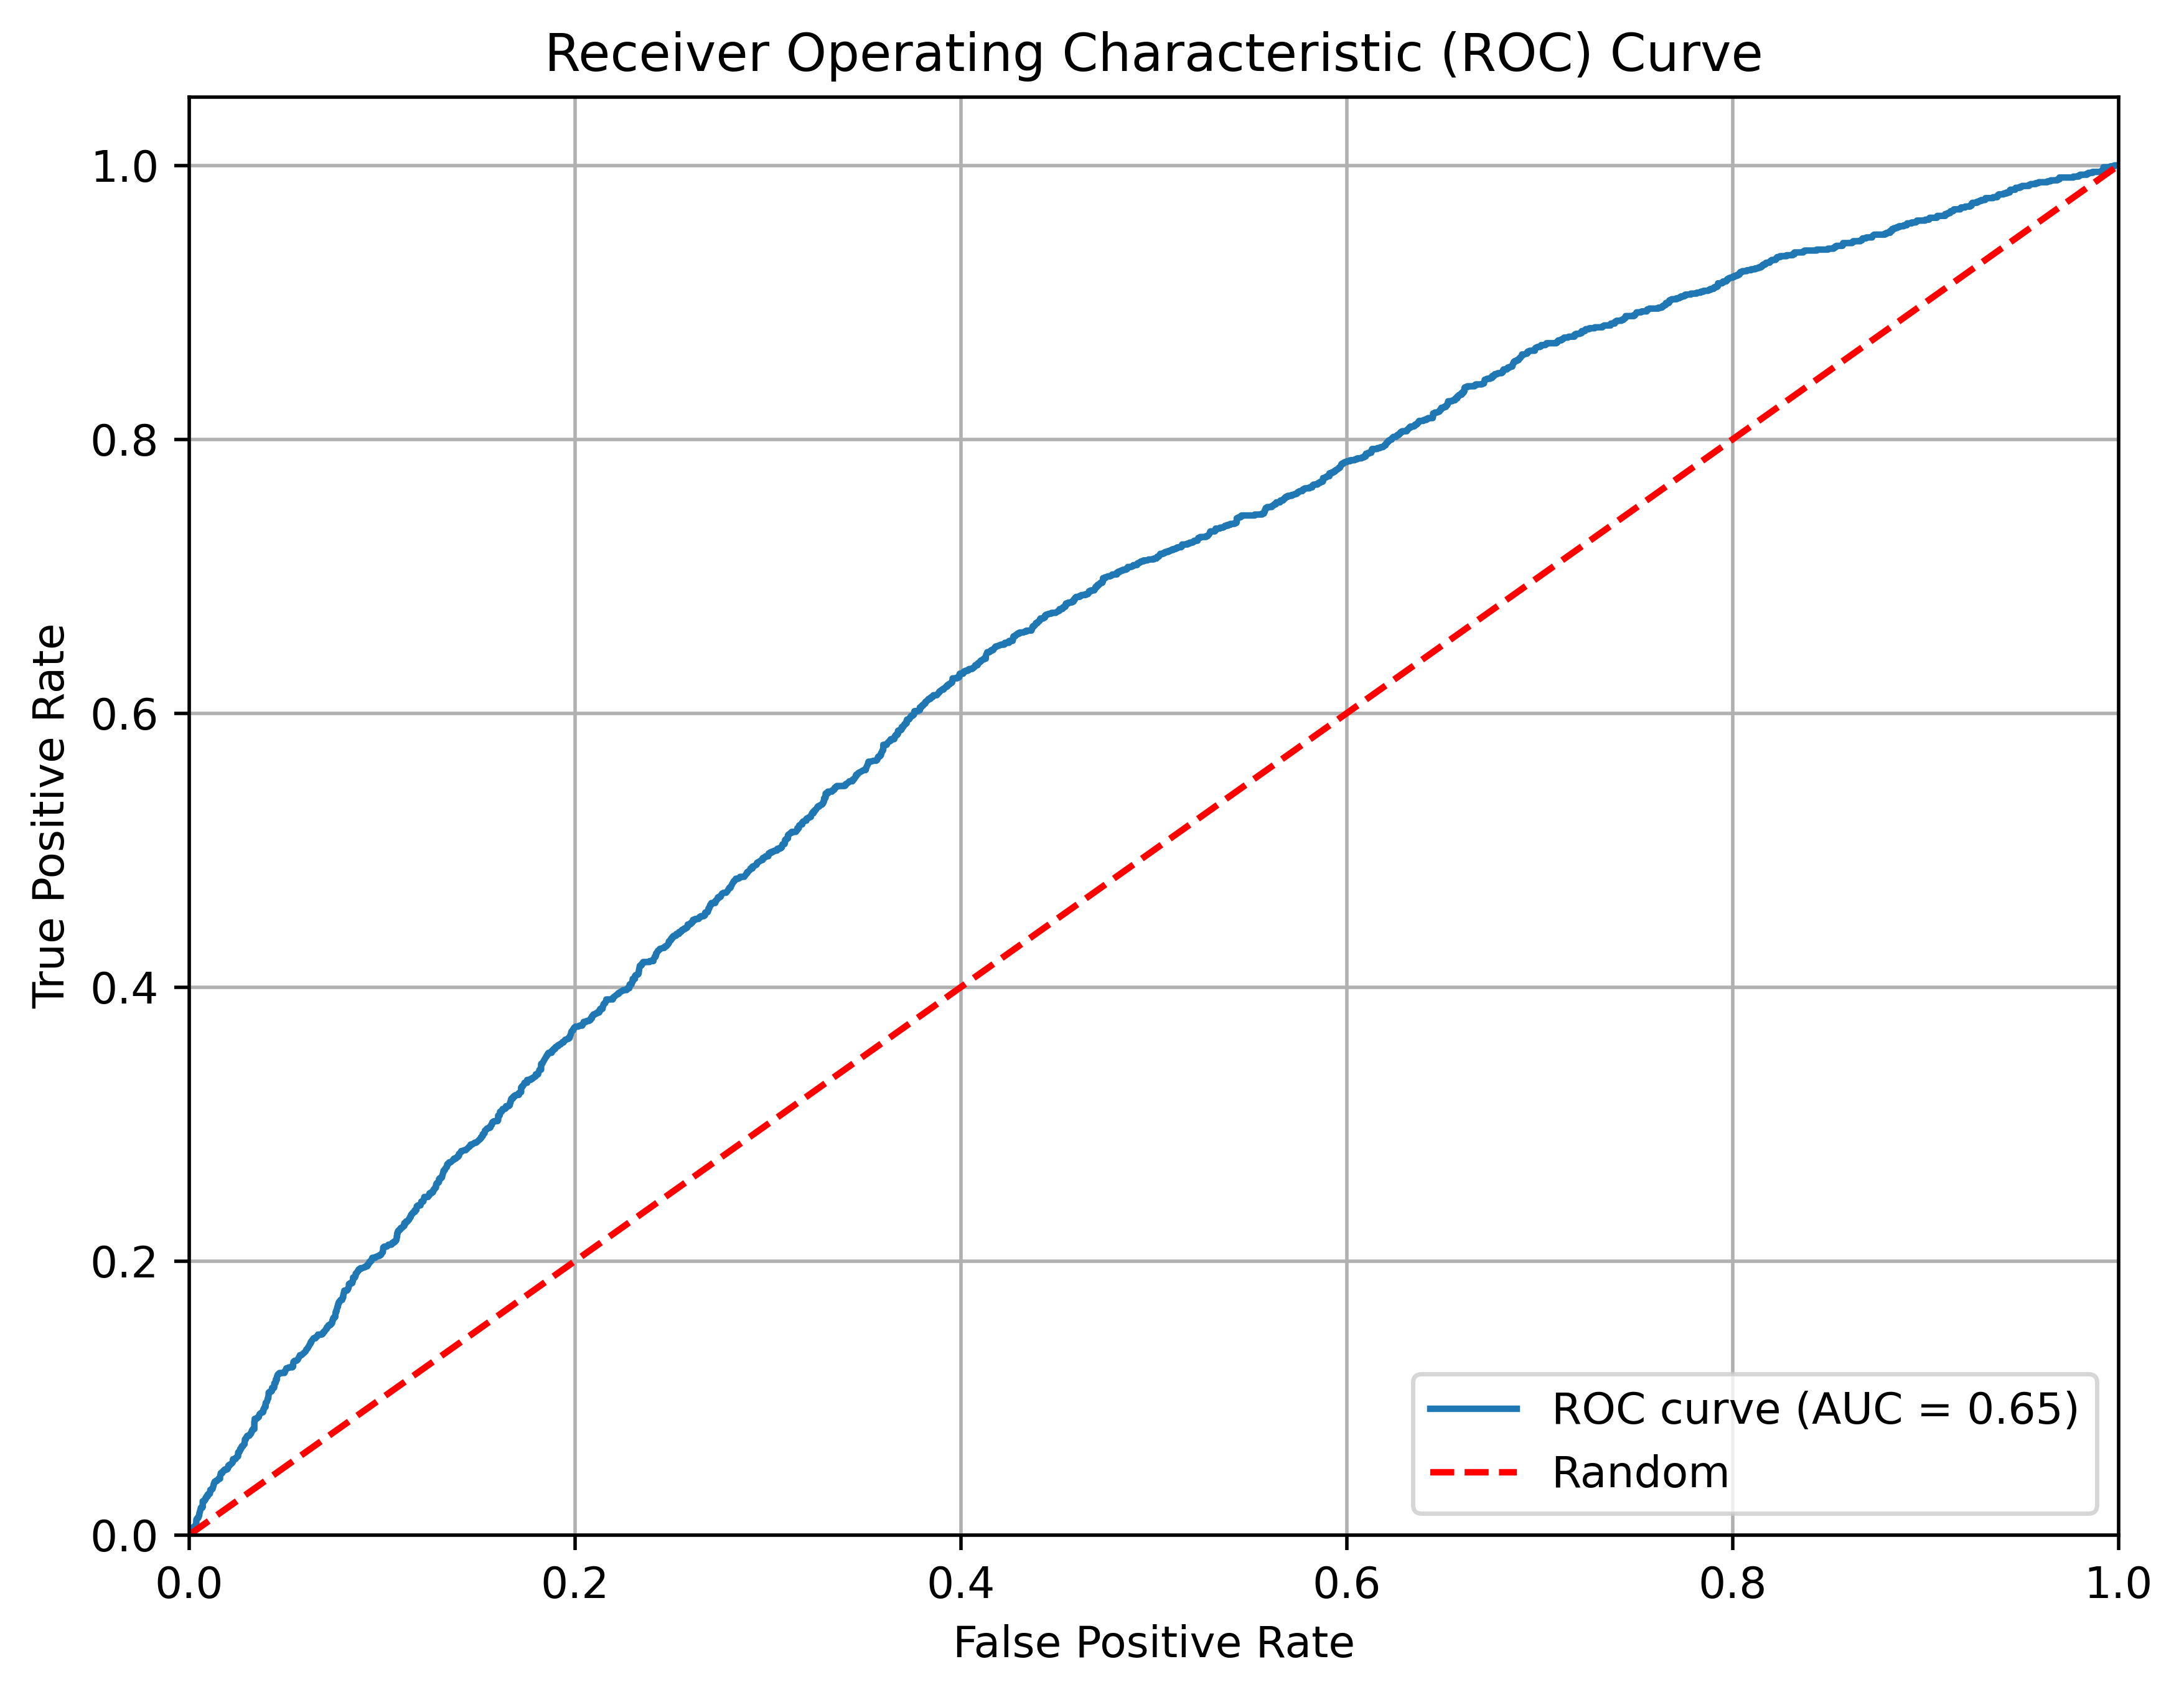

In [109]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_prob = best_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Plot the ROC curve
plt.figure(figsize=(8, 6), dpi=500)
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


end of task 05

Dostavame varovani, zkusme zmenit metriku:

In [110]:
from sklearn.metrics import roc_auc_score

# Define the scoring metric
scoring_metric = 'roc_auc'

# Create the GridSearchCV object with the updated scoring metric
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, scoring=scoring_metric)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its performance on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Compute the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC score:", auc_roc)

AUC-ROC score: 0.5


## Poznámky k odevzdání a vypracování

* Úkol vypracujte ve skupině. Pokud se budete s někým radit mimo skupinu, nezapomeňte u dané odpovědi uvést zdroj vašich informací. 

* Úkol můžete odevzdávat jako spustitelný jupyter notebook na google colab (stačí odevzdat link na github). Před odevzdáním ZKONTROLUJTE, že buňky na sebe navazují a že lze NB postupně projít a jednotlivé buňky nezahlásí chybu.

* Deadline pro odevzdání je stanoven na sředu 21.6.2023.

* Není možno odevzdání opakovat. Odevzdaný úkol zkontroluji a buď zápočet získáte, nebo ne. Je vyžadováno mít alespoň 75% úkolů správně.

* V případě otázek se ptejte veřejně v general kanále v MS Teams. Ostatní mohou mít podobné problémy a tudíž pokud je někde například nejasné zadání, tak ať mají všichni stejnou příležitost.

* Možno psát a odevzdat v Pythonu.